<a href="https://colab.research.google.com/github/GabrielGriseli/PLN_FALE_UFMG/blob/main/2/1_segmentacao_e_padronizacao_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação e Padronização de Textos

Segmentação e padronização de textos são **etapas de pré-processamento**

## O que é uma **palavra?**
No meio do caminho tinha uma pedra.

Agente é estudante de Letras. [a gente]

Te econtro no fds.

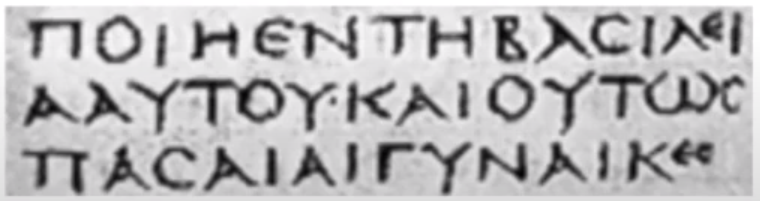

Vastatykistömaalinosoitustutkakalustojärjestelmäinsinöörierikoisupseeri

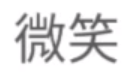

## Types vs. tokens (ou tipos vs. espécimes)

**Eu sou eu.**
* Types: "eu", "sou"
* Tokens: "eu", "sou", "eu"

**No meio do caminho tinha uma pedra**

**Tinha uma pedra no meio do caminho**
* Número de types: 7
* Número de tokens: 14

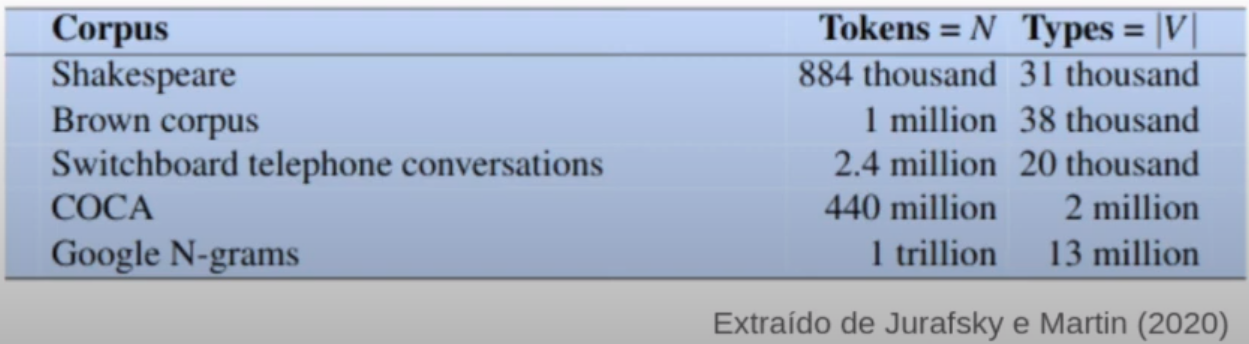

## Tokenização

In [3]:
import nltk
# nltk.download("punkt")
from nltk import tokenize

versos = """No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho"""

palavras = tokenize.word_tokenize(versos, language="portuguese")

print(len(palavras), palavras, "\n", len(set(palavras)), set(palavras))

14 ['No', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'Tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho'] 
 9 {'Tinha', 'No', 'meio', 'uma', 'no', 'do', 'tinha', 'pedra', 'caminho'}


https://www.nltk.org/api/nltk.tokenize.html

## Capitalização

In [4]:
import nltk
# nltk.download("punkt")
from nltk import tokenize

versos = """No meio do caminho tinha uma pedra
Tinha uma pedra no meio do caminho"""

palavras = tokenize.word_tokenize(versos.lower(), language="portuguese")

print(len(palavras), palavras, "\n", len(set(palavras)), set(palavras))

14 ['no', 'meio', 'do', 'caminho', 'tinha', 'uma', 'pedra', 'tinha', 'uma', 'pedra', 'no', 'meio', 'do', 'caminho'] 
 7 {'uma', 'meio', 'no', 'do', 'tinha', 'pedra', 'caminho'}


## Lexema, lema e raiz

* **Lexema** -> unidade (abstrata) de significado; corresponde a um conjunto de formas relacionadas
* **Lema** -> forma canônica, dicionarizada, escolhida por convenção para representar um lexema
* **Raiz** -> morfema básico, sem afixos derivacionais ou flexionais
---
* **Lexema** -> {comeu, comido, comendo, comerias, comeremos, ...}
* **Lema** -> comer
* **Raiz** -> com-
---
* **Lexema** -> {menino, menina, meninão, menininha, meninos, ...}
* **Lema** -> menino
* **Raiz** -> menin-
---
*A comida estava gostosa. Todos comeram e gostaram.*

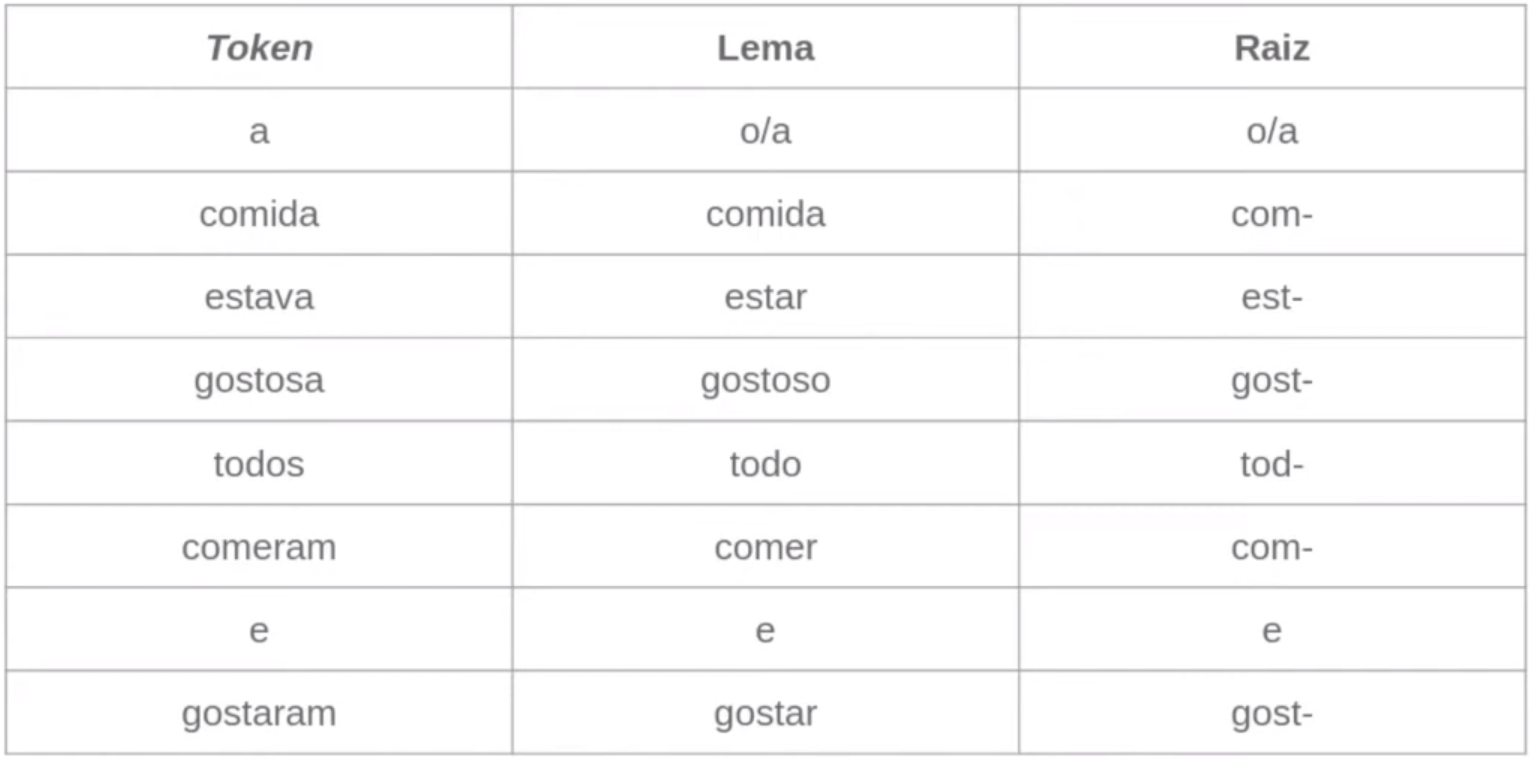

* **Lematização:**
  * Gato, gatos, gatinhos, gatonas, ... -> **gato**
  * Correndo, corro, corremos, correrás, ... -> **correr**
* **Radicalização (stemming):**
  * Gato, gatos, gatinhos, gatonas, ... -> **gat**
  * correndo, corro, corremos, correrás, ... -> **corr**

## Lematização

In [2]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("better :", lemmatizer.lemmatize("better", pos="a"))
print("gatos :", lemmatizer.lemmatize("gatos"))

rocks : rock
corpora : corpus
better : good
gatos : gatos


In [4]:
# !pip install -U pip stuptools wheel
# !pip install -U spacy
# !pip install -U spacy-lookups-data
# !python -m spacy download pt_core_news_sm

import spacy

pln = spacy.load("pt_core_news_sm")

frase = pln("A comida estava gostosa. Todos comeram e gostarem.")

lemas = []
for token in frase:
  lema = token.lemma_
  lemas.append(lema)

print(lemas)

['o', 'comida', 'estar', 'gostoso', '.', 'todo', 'comer', 'e', 'gostar', '.']


Em português, usando o SpaCy (https://spacy.io/usage)

## Radicalização (*stemming*)

In [7]:
import nltk
# nltk.download("rslp")

raiz = nltk.stem.RSLPStemmer()

print(raiz.stem("a"),
raiz.stem("comida"),
raiz.stem("estava"),
raiz.stem("gostosa"),
raiz.stem("todos"),
raiz.stem("comeram"),
raiz.stem("e"),
raiz.stem("gostaram"))

a com est gost tod com e gost


RSLP (Removedor de Sufixos da Língua Portuguesa): https://www.inf.ufrgs.br/~viviane/rslp/index.htm

## Segmentação de frases

In [10]:
import nltk
# nltk.download("punkt")

frases = nltk.data.load("tokenizers/punkt/portuguese.pickle")

citacao_darcy = """Fracassei em tudo o que tentei na vida. Tentei alfabetizar as crianças brasileiras, não consegui.
Tentei salvar os índios, não consegui. Tentei fazer uma universidade séria e fracassei.
Tentei fazer o Brasil desenvolver-se autonomamente e fracassei. Mas os fracassos são minhas vitórias.
Eu detestaria estar no lugar de quem me venceu."""

frases.tokenize(citacao_darcy)

['Fracassei em tudo o que tentei na vida.',
 'Tentei alfabetizar as crianças brasileiras, não consegui.',
 'Tentei salvar os índios, não consegui.',
 'Tentei fazer uma universidade séria e fracassei.',
 'Tentei fazer o Brasil desenvolver-se autonomamente e fracassei.',
 'Mas os fracassos são minhas vitórias.',
 'Eu detestaria estar no lugar de quem me venceu.']

Para mais exemplos de processamento em português no NLTK: https://www.nltk.org/howto/portuguese_en.html

## Exercício (parte 1)

Muitas vezes, o pré-processamento dos corpora que usamos para os nossos trabalhos envolve a realização de todas as tarefas que vimos nesta aula. Neste exercício, vamos passar por praticamente todas elas.

Selecione um texto com o qual você queira trabalhar (pode ser um texto pequeno ou grande, não importa) e realize as seguintes tarefas, na seguinte ordem:
* faça a tokenização e ajuste a capitalização, transformando todos os caracteres em minúsculas;

## Exercício (parte 2)

* conte a quantidade de types e tokens no seu texto (atenção: a pontuação muitas vezes aparece nessa contagem. Pense em uma forma de resolver isso);
* faça um ranking dos 20 types mais frequentes no texto, mostrando também a frequência de cada um deles;
* faça a lematização e a radicalização das palavras do texto;
* faça um ranking dos 20 lemas e das 20 raízes mais frequentes no texto, novamente mostrando a frequência de cada um deles.

O que você pode observar ao comparar os rankings de types, lemas e raízes mais frequentes do texto? Algum padrão especial ou interessante?

## Sumário

Conteúdo da Aula:
* Conceito de palavra
* *Types vs. tokens*
* Tokenização
* Padronização de capitalização
* Lexema, lema e raiz
* Lematização e radicalização (*stemming*)
* Segmentação de frases